In [7]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

from Preprocessing_Hugo import *
from Data_Augmentation_Hugo import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of Data_Augmentation_Hugo failed: Traceback (most recent call last):
  File "c:\users\utilisateur\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "c:\users\utilisateur\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 455, in superreload
    module = reload(module)
  File "c:\Users\utilisateur\anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "c:\Users\utilisateur\Documents\GitHub\CS-433-Project_2_Ant_Segmentation\Data_Augmentation_Hugo.py", line 5, in <module>
    "execution_count": null,
NameError: name 'null' is not defined
]


In [8]:
# Paths (Change it according to your computer, works only for me)
images_path = 'C:\\Users\\utilisateur\\Documents\\GitHub\\CS-433-Project_2_Ant_Segmentation\\images_finales'  
masks_path = 'C:\\Users\\utilisateur\\Documents\\GitHub\\CS-433-Project_2_Ant_Segmentation\\muticlass_model\\muticlass_model\\masks_4_categories'  

# Have uniform images for the model. 256x256 may be too large and need too much computational ressources, if it the case, we can 
# change it to 128x128 but small regions or details may be skipped
image_size = (256, 256)  # Resize all images to this size

In [11]:
# Preprocess images and masks
images = preprocess_images(images_path, image_size)
masks = preprocess_masks(masks_path, image_size)

for i, mask in enumerate(masks):
    if 4 in np.unique(mask):  # Check if 4 exists
        masks[i][mask == 4] = 0

# Check if all only 4 parts (background, head, thorax, abdomen)
for i, mask in enumerate(masks):
    unique_values = np.unique(mask)
    if any(value not in [0, 1, 2, 3] for value in unique_values):
        print(f"Mask {i} has unexpected values: {unique_values}")
        

# Split the data
x_train, x_val, y_train, y_val = split_data(images, masks)

# Verify shapes
print(f"Images shape: {images.shape}")
print(f"Masks shape: {masks.shape}")
print(f"Training set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")


Images shape: (190, 256, 256, 3)
Masks shape: (190, 256, 256)
Training set: (152, 256, 256, 3), (152, 256, 256)
Validation set: (38, 256, 256, 3), (38, 256, 256)


In [12]:
augmented_x_train, augmented_y_train = augment_dataset(x_train, y_train, num_augmentations=2)

# Verify the shapes of augmented datasets
print(f"Original training set size: {x_train.shape}")
print(f"Augmented training set size: {augmented_x_train.shape}")

unique_values = np.unique(augmented_y_train)
print(f"Unique values in augmented_y_train: {unique_values}")

Original training set size: (152, 256, 256, 3)
Augmented training set size: (456, 256, 256, 3)
Unique values in augmented_y_train: [0 1 2 3]


# Verification of preprocessing and Data Augmentation

Image shape (preprocessed): (256, 256, 3)
Mask shape (preprocessed): (256, 256)
Image pixel range: 0.0 to 1.0
Mask unique values: [0 1 2 3]


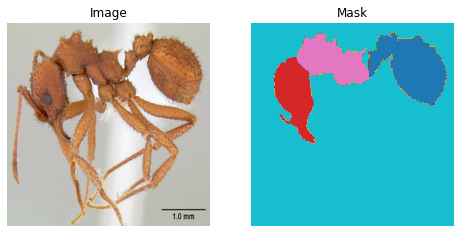

In [13]:
# Verify shapes
print(f"Image shape (preprocessed): {x_train[0].shape}")
print(f"Mask shape (preprocessed): {y_train[0].shape}")

# Verify pixel ranges
print(f"Image pixel range: {x_train.min()} to {x_train.max()}")  # Should be 0.0 to 1.0
print(f"Mask unique values: {np.unique(y_train[0])}")  # Should be class indices (e.g., 0, 1, 2, 3)

# Visualize a few examples
import matplotlib.pyplot as plt

def visualize_image_mask(image, mask):
    plt.figure(figsize=(8, 4))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.axis("off")

    # Corresponding Mask
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="tab10")  # Use a colormap to distinguish classes
    plt.title("Mask")
    plt.axis("off")
    
    plt.show()

# Visualize the first image-mask pair
visualize_image_mask(x_train[0], y_train[0])

Augmented image shape: (256, 256, 3)
Augmented mask shape: (256, 256)
Augmented image pixel range: 0.0 to 1.0
Augmented mask unique values: [0 1 2 3]


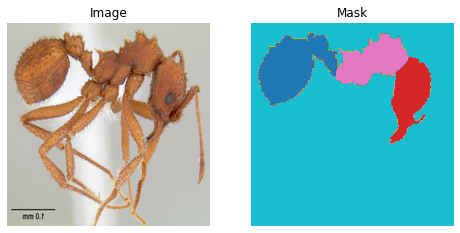

Augmented dataset size: (15, 256, 256, 3), (15, 256, 256)


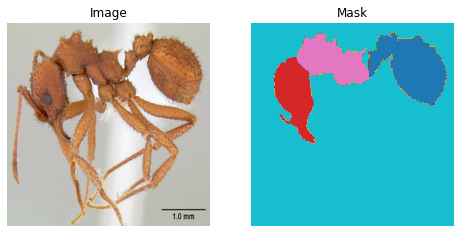

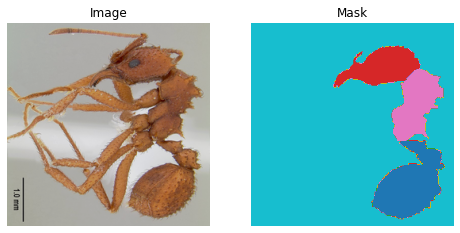

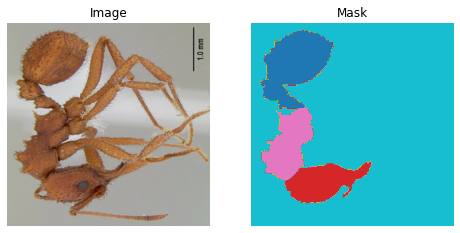

In [14]:
# Generate one augmented image-mask pair
augmented_image, augmented_mask = augment_image_and_mask(x_train[0], y_train[0])

# Verify augmented image and mask properties
print(f"Augmented image shape: {augmented_image.shape}")
print(f"Augmented mask shape: {augmented_mask.shape}")
print(f"Augmented image pixel range: {augmented_image.min()} to {augmented_image.max()}")
print(f"Augmented mask unique values: {np.unique(augmented_mask)}")

# Visualize the augmented pair
visualize_image_mask(augmented_image, augmented_mask)

# Generate a small batch of augmented data
augmented_x, augmented_y = augment_dataset(x_train[:5], y_train[:5], num_augmentations=2)

# Verify the new dataset size
print(f"Augmented dataset size: {augmented_x.shape}, {augmented_y.shape}")

# Visualize a few augmented pairs
for i in range(3):  # Visualize 3 examples
    visualize_image_mask(augmented_x[i], augmented_y[i])

In [15]:
from U_net_Model_Hugo import *


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\utilisateur\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\utilisateur\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\utilisateur\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\users\utili

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\utilisateur\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\utilisateur\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\utilisateur\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\users\utili

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\utilisateur\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\utilisateur\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\utilisateur\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\users\utili

AttributeError: _ARRAY_API not found

In [16]:
# Build the model
input_shape = (256, 256, 3)  # Change this if input size differs
num_classes = 4  # Background, head, thorax, abdomen
unet_model = build_unet(input_shape, num_classes)

# Compile the model
unet_model.compile(optimizer="adam",
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

# Display the model summary
unet_model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]  

 Total params: 31,055,492 (118.47 MB)

 Trainable params: 31,043,716 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


In [18]:
# Set up training parameters
epochs = 50  # Adjust based on your hardware and dataset
batch_size = 16  # Lower if you encounter memory issues
validation_split = 0.2  # Fraction of the data used for validation

# Checkpoint to save the best model
checkpoint = ModelCheckpoint(
    "best_unet_model.keras",  # Save the model to this file (Keras format)
    monitor="val_loss",  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode="min",  # Minimize the monitored metric
    verbose=1
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=10,  # Stop training if no improvement for 10 epochs
    restore_best_weights=True,  # Restore the best weights
    mode="min",
    verbose=1
)

# Train the model
history = unet_model.fit(
    augmented_x_train,
    tf.keras.utils.to_categorical(augmented_y_train, num_classes=4),  # Convert masks to one-hot encoding
    validation_split=validation_split,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/50
 9/23 ━━━━━━━━━━━━━━━━━━━━ 20:23 87s/step - accuracy: 0.5030 - loss: 1.2736

KeyboardInterrupt: 